In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#import mpld3 #has to be installed via pip (pip install mpld3)

#mpld3.enable_notebook() #enables zooming in figures?

In [2]:
#train = pd.read_csv("C:\\Users\\Leo\\TaxiData\\train.csv")
ad_feature = pd.read_csv("C:\\Users\\Leo\\AdData\\ad_feature.csv")
train = pd.read_csv("C:\\Users\\Leo\\AdData\\train.csv")
train = train.drop(["nonclk"],axis=1)

user_profile = pd.read_csv("C:\\Users\\Leo\\AdData\\user_profile.csv")
behavior_log = pd.read_csv("C:\\Users\\Leo\\AdData\\behavior_log.csv")

In [129]:
test = pd.read_csv("C:\\Users\\Leo\\AdData\\test.csv")

In [4]:
#train = pd.read_csv("C:\\Users\\Leo\\TaxiData\\train.csv")
ad_feature = pd.read_csv("C:\\Users\\Leo\\AdData\\ad_feature.csv")
train = pd.read_csv("C:\\Users\\Leo\\AdData\\train_extended.csv")
test = pd.read_csv("C:\\Users\\Leo\\AdData\\test_extended.csv")

user_profile = pd.read_csv("C:\\Users\\Leo\\AdData\\user_profile.csv")
behavior_log = pd.read_csv("C:\\Users\\Leo\\AdData\\behavior_log.csv")

In [2]:
#train = pd.read_csv("C:\\Users\\Leo\\TaxiData\\train.csv")
ad_feature = pd.read_csv("C:\\Users\\Leo\\AdData\\ad_feature.csv")
train = pd.read_csv("C:\\Users\\Leo\\AdData\\train_extended2.csv")
test = pd.read_csv("C:\\Users\\Leo\\AdData\\test_extended2.csv")

user_profile = pd.read_csv("C:\\Users\\Leo\\AdData\\user_profile.csv")
behavior_log = pd.read_csv("C:\\Users\\Leo\\AdData\\behavior_log.csv")

In [5]:
train.columns

Index(['user', 'time_stamp', 'adgroup_id', 'pid', 'clk', 'cate_id',
       'campaign_id', 'customer', 'brand', 'price', 'cms_segid',
       'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level',
       'shopping_level', 'occupation', 'new_user_class_level ', 'unix',
       'weekday', 'hour', 'weekend', 'buy', 'cart', 'fav', 'pv',
       'total_actions', 'pv_cate', 'cart_cate', 'fav_cate', 'buy_cate',
       'total_cate', 'click_ratio', 'clicks_per_ad', 'click_ratio_per_ad',
       'clicks_per_cate', 'click_ratio_per_cate', 'clicks_per_brand',
       'click_ratio_per_brand', 'clicks', 'mean_price_category',
       'mean_price_brand', 'add_clicked_ratio', 'pv_brand', 'cart_brand',
       'fav_brand', 'buy_brand', 'total_brand', 'total_money_spent_brand',
       'total_money_spent_cate'],
      dtype='object')

In [5]:
ad_feature.describe()

,adgroup_id,cate_id,campaign_id,customer,brand,price
count,846811.000000,846811.000000,846811.000000,846811.000000,600481.000000,8.468110e+05
mean,423406.000000,5868.593464,206552.604280,113180.406006,229254.422596,1.838867e+03
std,244453.423738,2705.171203,125192.340908,73435.834950,132288.849633,3.108877e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000e-02
25%,211703.500000,4383.000000,97583.000000,47960.000000,110616.000000,4.900000e+01
50%,423406.000000,6183.000000,200780.000000,107278.000000,234423.000000,1.390000e+02
75%,635108.500000,7047.000000,314565.500000,172013.500000,344818.000000,3.520000e+02
max,846811.000000,12960.000000,423436.000000,255875.000000,461497.000000,1.000000e+08


#  TODO
- more EDA / Visualization
- remove duplicate entries in behavior_log
- - make this smarter with a tolerance threshold for timestamp (e.g. entries are also duplicate if same entry happens within 10 seconds or so?)
- remove outliers e.g. adds with unrealistic high prices
- predict missing brand information, based on common (campaign_id, brand) tuples -> use also apriory rules here?
- predict missing pvalue and new_user_class values (e.g. k nearest neighbor?)
- mark adds as bargains (only x% of mean price in that category?)
- make internal predictions with train and test set
- adjust add_clicked_ratio

### Merge all information into train set

In [7]:
train = train.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")

In [8]:
train = train.join(user_profile.set_index("userid"),on="user")

In [9]:
train.head()

,user,time_stamp,adgroup_id,pid,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,286630,1494218579,13,430539_1007,0,7211,130458,6395,112840.0,289.0,17,3,2,3,1.0,3,0,4.0
1,286630,1494289247,13,430539_1007,0,7211,130458,6395,112840.0,289.0,17,3,2,3,1.0,3,0,4.0
2,26279,1494478631,38,430539_1007,0,4535,394495,5122,387739.0,1800.0,0,9,1,3,NaN,3,0,2.0
3,683451,1494229042,85,430539_1007,0,6873,398858,53487,443907.0,720.0,0,11,1,5,NaN,3,0,4.0
4,738208,1494198871,102,430548_1007,0,126,138148,20107,102457.0,98.0,34,4,2,4,2.0,3,0,4.0


### Add weekday, hour and weekend fields

In [10]:
train["unix"]=pd.to_datetime(train.time_stamp,unit="s")
train["weekday"]=train.unix.dt.weekday
train["hour"]=train.unix.dt.hour
train["weekend"] = train.weekday >= 5

In [27]:
corr = train.corr()["clk"].to_frame()

TypeError: Object of type 'ndarray' is not JSON serializable

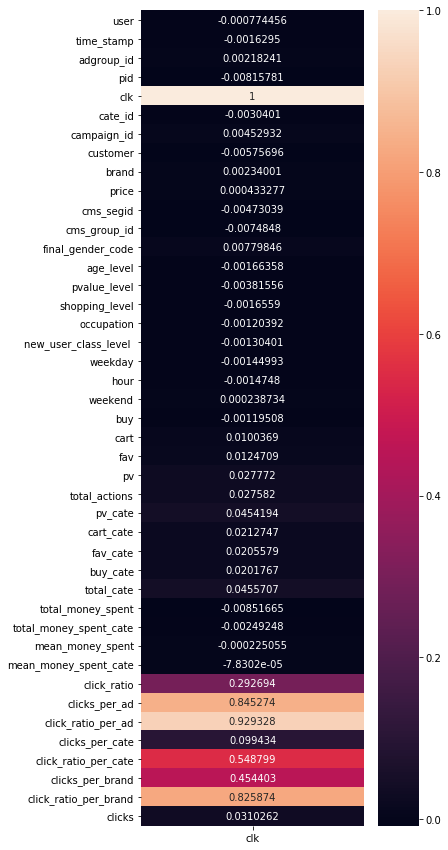

In [28]:
plt.figure(figsize=(5,15))
sns.heatmap(corr,annot=True,fmt="g")

## Analysis Behavior Log

In [12]:
behavior_log.head()

,user,time_stamp,btag,cate,brand
0,308688,1493820198,pv,6408,258638
1,591909,1493814087,pv,5744,321326
2,876901,1493797178,pv,7621,104107
3,876901,1493797679,pv,7621,104107
4,57178,1493744427,pv,7205,167727


In [169]:
behavior_log.shape

(64795089, 9)

In [77]:
%%time
behavior_log.drop_duplicates(["user","time_stamp","btag"]).shape

Wall time: 15.3 s


(59921487, 5)

In [231]:
%%time
behavior_log.drop_duplicates(["user","time_stamp"]).shape

Wall time: 20 s


(59565105, 5)

In [15]:
behavior_log["unix"]=pd.to_datetime(behavior_log.time_stamp,unit="s")
behavior_log["weekday"]=behavior_log.unix.dt.weekday
behavior_log["hour"]=behavior_log.unix.dt.hour
behavior_log["weekend"] = behavior_log.weekday >= 5

In [16]:
behavior_log.describe()

,user,time_stamp,cate,brand,weekday,hour
count,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07
mean,5.768753e+05,1.493774e+09,5.704339e+03,2.125735e+05,3.060469e+00,9.484853e+00
std,3.278639e+05,6.313171e+06,2.522228e+03,1.330231e+05,2.007559e+00,5.706902e+00
min,1.000000e+01,-2.101140e+09,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.923620e+05,1.493303e+09,4.314000e+03,9.401200e+04,1.000000e+00,5.000000e+00
50%,5.795260e+05,1.493816e+09,6.183000e+03,2.046970e+05,3.000000e+00,9.000000e+00
75%,8.566440e+05,1.494256e+09,6.508000e+03,3.262820e+05,5.000000e+00,1.400000e+01
max,1.141723e+06,1.727021e+09,1.297600e+04,4.615270e+05,6.000000e+00,2.300000e+01


In [17]:
behavior_log.shape

(64795089, 9)

In [18]:
behavior_log.head()

,user,time_stamp,btag,cate,brand,unix,weekday,hour,weekend
0,308688,1493820198,pv,6408,258638,2017-05-03 14:03:18,2,14,False
1,591909,1493814087,pv,5744,321326,2017-05-03 12:21:27,2,12,False
2,876901,1493797178,pv,7621,104107,2017-05-03 07:39:38,2,7,False
3,876901,1493797679,pv,7621,104107,2017-05-03 07:47:59,2,7,False
4,57178,1493744427,pv,7205,167727,2017-05-02 17:00:27,1,17,False


In [164]:
behavior_groups = behavior_log.groupby(["user"]).size()

In [165]:
behavior_log

,user,time_stamp,btag,cate,brand,unix,weekday,hour,weekend
0,308688,1493820198,pv,6408,258638,2017-05-03 14:03:18,2,14,False
1,591909,1493814087,pv,5744,321326,2017-05-03 12:21:27,2,12,False
2,876901,1493797178,pv,7621,104107,2017-05-03 07:39:38,2,7,False
3,876901,1493797679,pv,7621,104107,2017-05-03 07:47:59,2,7,False
4,57178,1493744427,pv,7205,167727,2017-05-02 17:00:27,1,17,False
5,738740,1493802165,pv,5464,264936,2017-05-03 09:02:45,2,9,False
6,1111848,1493747053,pv,6208,454006,2017-05-02 17:44:13,1,17,False
7,628854,1493781424,buy,4262,370203,2017-05-03 03:17:04,2,3,False
8,785643,1493822932,pv,6412,96483,2017-05-03 14:48:52,2,14,False
9,785643,1493822950,pv,6412,96483,2017-05-03 14:49:10,2,14,False


## Analysing adds themselves

In [3]:
ad_feature.head()

,adgroup_id,cate_id,campaign_id,customer,brand,price
0,63133,6406,83237,1,95471.0,170.00
1,313401,6406,83237,1,87331.0,199.00
2,248909,392,83237,1,32233.0,38.00
3,208458,392,83237,1,174374.0,139.00
4,110847,7211,135256,2,145952.0,32.99


In [4]:
#ads in trainset that are not in adfeature
len(set(train.adgroup_id.unique())-set(ad_feature.adgroup_id.unique()))

0

In [5]:
#ads in testset that are not in adfeature
len(set(test.adgroup_id.unique())-set(ad_feature.adgroup_id.unique()))

0

In [6]:
#ads in adfeature that are not in trainset
len(set(ad_feature.adgroup_id.unique())-set(train.adgroup_id.unique()))

516378

In [125]:
ad_feature.columns

Index(['adgroup_id', 'cate_id', 'campaign_id', 'customer', 'brand', 'price',
       'mean_price_category', 'mean_price_brand',
       'diff_ad_price_to_mean_price_cate',
       'diff_ad_price_to_mean_price_brand'],
      dtype='object')

In [7]:
#average price per category
mean_price_category = ad_feature.groupby("cate_id")["price"].mean()
mean_price_category = mean_price_category.to_frame().reset_index().rename(index=str,columns={"price":"mean_price_category"})
ad_feature = pd.merge(ad_feature,mean_price_category,how="left",left_on=["cate_id"], right_on=["cate_id"])

#average price per brand
mean_price_brand = ad_feature.groupby("brand")["price"].mean()
mean_price_brand = mean_price_brand.to_frame().reset_index().rename(index=str,columns={"price":"mean_price_brand"})
ad_feature = pd.merge(ad_feature,mean_price_brand,how="left",left_on=["brand"], right_on=["brand"])

#difference: average price per category to ad price
ad_feature["diff_ad_price_to_mean_price_cate"] = ad_feature.price-ad_feature.mean_price_category

#difference: average price per brand to ad price
ad_feature["diff_ad_price_to_mean_price_brand"] = ad_feature.price-ad_feature.mean_price_brand

In [130]:
#merge into train
train = train.join(ad_feature.set_index(['cate_id', 'campaign_id', 'customer', 'brand', 'price',"adgroup_id",'mean_price_category', 'mean_price_brand']),
                   on=['cate_id', 'campaign_id', 'customer', 'brand', 'price',"adgroup_id",'mean_price_category', 'mean_price_brand'])

In [215]:
#merge into test
test = test.join(ad_feature.set_index(['cate_id', 'campaign_id', 'customer', 'brand', 'price',"adgroup_id",]),
                   on=['cate_id', 'campaign_id', 'customer', 'brand', 'price',"adgroup_id"])

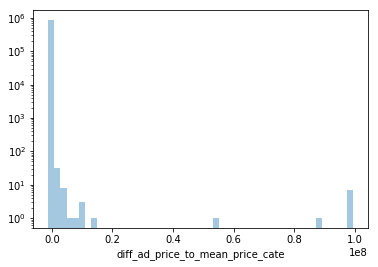

In [30]:
sns.distplot(ad_feature.diff_ad_price_to_mean_price_cate,hist_kws={"log":True},kde=False)

In [48]:
ad_feature[["adgroup_id","cate_id","price","mean_price_category","mean_price_brand","diff_ad_price_to_mean_price_cate","diff_ad_price_to_mean_price_brand"]].sort_values(by="diff_ad_price_to_mean_price_cate").head()

,adgroup_id,cate_id,price,mean_price_category,mean_price_brand,diff_ad_price_to_mean_price_cate,diff_ad_price_to_mean_price_brand
196561,782708,745,1.0,1.188429e+06,NaN,-1.188428e+06,NaN
354895,706083,745,1.0,1.188429e+06,NaN,-1.188428e+06,NaN
354891,93099,745,1.0,1.188429e+06,NaN,-1.188428e+06,NaN
354888,777451,745,1.0,1.188429e+06,NaN,-1.188428e+06,NaN
354903,435913,745,1.0,1.188429e+06,NaN,-1.188428e+06,NaN


In [ ]:
#what to do with campaigns and customer?

## Calculate total number of actions per user and per action type 

In [19]:
behavior_groups_btags = behavior_log.groupby(["user","btag"]).size().unstack()
behavior_groups_btags["total_actions"] = behavior_groups_btags.sum(1) #rowsum
behavior_groups_btags = behavior_groups_btags.fillna(0)

In [20]:
behavior_groups_btags.head()

btag,buy,cart,fav,pv,total_actions
user,,,,,
10,2.0,0.0,1.0,73.0,76.0
21,2.0,2.0,0.0,78.0,82.0
22,0.0,0.0,0.0,1.0,1.0
37,10.0,5.0,37.0,1255.0,1307.0
68,12.0,1.0,4.0,259.0,276.0


In [21]:
train = train.join(behavior_groups_btags,on="user")

## Calculate number of actions in category

In [56]:
train.loc[0]

user                                  286630
time_stamp                        1494218579
adgroup_id                                13
pid                                        0
clk                                        0
cate_id                                 7211
campaign_id                           130458
customer                                6395
brand                                 112840
price                                    289
cms_segid                                 17
cms_group_id                               3
final_gender_code                          2
age_level                                  3
pvalue_level                               1
shopping_level                             3
occupation                                 0
new_user_class_level                       4
unix                     2017-05-08 04:42:59
weekday                                    0
hour                                       4
weekend                                False
buy       

In [62]:
%%time
#old slow code, saved if timing code is needed later
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","cate"],as_index=False)
counter = 0


#group by user and category, so we look up each combination only once (reduces #lookups to a forth)
user_category_groups = train.groupby(["user","cate_id"]).size().reset_index(name="count")
behavior_by_category = pd.DataFrame()

start_time = 0
for index, row in user_category_groups.iterrows():
    start_time = start_time or timeit.default_timer()
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.cate_id)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_category_groups.at[index,i+"_cate"] = count
            total_action_count += count
        else:
            user_category_groups.at[index,i+"_cate"] = 0

    user_category_groups.at[index,"total_cate"] = total_action_count
    
    #print progress
    counter +=1
    clear_output(wait=True)
    elapsed = timeit.default_timer() - start_time
    total = len(user_category_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)

('Done with row 1 of 535560, 0.00018672%. Runtime: 0:05:25.969374, exp. remaining: 2020 days, 13:17:11.770083 ',)

Wall time: 5min 26s


In [198]:
user_category_groups=user_category_groups.drop(["count"],axis=1)
train = pd.merge(train,user_category_groups,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

In [156]:
#users in test that are not in behavior log
len(set(test.user.unique())-set(behavior_log.user.unique()))

32

In [158]:
#users in test that are not in train
len(set(test.user.unique())-set(train.user.unique()))

3215

In [166]:
#users in train that are not in behavior_log
len(set(train.user.unique())-set(behavior_log.user.unique()))

271

## Calculate number of actions per brand

In [8]:
%%time
#old slow code, saved if timing code is needed later
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","brand"],as_index=False)
counter = 0

#group by user and brand, so we look up each combination only once (reduces #lookups)
user_brand_groups = train.groupby(["user","brand"]).size().reset_index(name="count")

start_time = 0
for index, row in user_brand_groups.iterrows():
    
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.brand)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_brand_groups.at[index,i+"_brand"] = count
            total_action_count += count
        else:
            user_brand_groups.at[index,i+"_brand"] = 0

    user_brand_groups.at[index,"total_brand"] = total_action_count
    
    start_time = start_time or timeit.default_timer()
    #print progress
    counter +=1
    clear_output(wait=True)
    elapsed = timeit.default_timer() - start_time
    total = len(user_brand_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)

('Done with row 1005552 of 1005552, 100.0%. Runtime: 0:28:26.050344, exp. remaining: 0:00:00 ',)

Wall time: 35min 29s


In [9]:
user_brand_groups=user_brand_groups.drop(["count"],axis=1)
train = pd.merge(train,user_brand_groups,how="left",left_on=["user","brand"], right_on=["user","brand"])

In [124]:
train.iloc[0]

user                                           286630
time_stamp                                 1494218579
adgroup_id                                         13
pid                                                 0
clk                                                 0
cate_id                                          7211
campaign_id                                    130458
customer                                         6395
brand                                          112840
price                                             289
cms_segid                                          17
cms_group_id                                        3
final_gender_code                                   2
age_level                                           3
pvalue_level                                        1
shopping_level                                      3
occupation                                          0
new_user_class_level                                4
unix                        

In [132]:
train.to_csv("train_again.csv")

## Calculate features related to pricing

E.g. total money spent, total money spent per category, average money spent, average money spent per category

Clicks per add id  / cate / brand, same with ratio, ad seen previously

In [11]:
behavior_log.head()

,user,time_stamp,btag,cate,brand
0,308688,1493820198,pv,6408,258638
1,591909,1493814087,pv,5744,321326
2,876901,1493797178,pv,7621,104107
3,876901,1493797679,pv,7621,104107
4,57178,1493744427,pv,7205,167727


In [11]:
ad_feature.head()

,adgroup_id,cate_id,campaign_id,customer,brand,price,mean_price_category,mean_price_brand,diff_ad_price_to_mean_price_cate,diff_ad_price_to_mean_price_brand
0,63133,6406,83237,1,95471.0,170.00,158.349280,139.555556,11.650720,30.444444
1,313401,6406,83237,1,87331.0,199.00,158.349280,206.500000,40.650720,-7.500000
2,248909,392,83237,1,32233.0,38.00,127.128000,116.416667,-89.128000,-78.416667
3,208458,392,83237,1,174374.0,139.00,127.128000,244.250000,11.872000,-105.250000
4,110847,7211,135256,2,145952.0,32.99,469.619725,32.990000,-436.629725,0.000000


In [ ]:
# to get money spent, we have to check each buy from behaviorlog, calculate average price in a category and 
# from that estimate the total money spent, money spent per category, money spent per brand

In [72]:
train.columns

Index(['user', 'time_stamp', 'adgroup_id', 'pid', 'clk', 'cate_id',
       'campaign_id', 'customer', 'brand', 'price', 'cms_segid',
       'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level',
       'shopping_level', 'occupation', 'new_user_class_level ', 'unix',
       'weekday', 'hour', 'weekend', 'buy', 'cart', 'fav', 'pv',
       'total_actions', 'pv_cate', 'cart_cate', 'fav_cate', 'buy_cate',
       'total_cate', 'click_ratio', 'clicks_per_ad', 'click_ratio_per_ad',
       'clicks_per_cate', 'click_ratio_per_cate', 'clicks_per_brand',
       'click_ratio_per_brand', 'clicks', 'mean_price_category',
       'mean_price_brand', 'add_clicked_ratio', 'pv_brand', 'cart_brand',
       'fav_brand', 'buy_brand', 'total_brand', 'total_money_spent_brand',
       'total_money_spent_cate', 'ads_shown', 'ads_shown_per_ad',
       'ads_shown_per_cate', 'ads_shown_per_brand', 'adjusted_click_ratio',
       'adjusted_click_ratio_per_ad', 'adjusted_click_ratio_per_cate',
       'adjus

In [87]:
train["total_money_spent_cate"] = train.buy_cate*train.mean_price_category
train["total_money_spent_brand"] = train.buy_brand*train.mean_price_brand

In [228]:
test["total_money_spent_cate"] = test.buy_cate*test.mean_price_category
test["total_money_spent_brand"] = test.buy_brand*test.mean_price_brand

In [29]:
#total_money is more complicated: we have to go over every buy event from user and sum up the price based on the mean category price
buys = behavior_log[behavior_log.btag=="buy"]
buys.shape

(832753, 5)

In [31]:
buys= buys[buys.cate.isin(ad_feature.cate_id.unique())]
buys.shape

(705346, 5)

In [30]:
idList = np.unique(np.append(train.cate_id.unique(),test.cate_id.unique()))

In [32]:
buys = buys[buys.cate.isin(idList)]
buys.shape

(698519, 5)

In [33]:
buys = buys[["user","cate"]]

In [8]:
a = ad_feature[["cate_id","mean_price_category"]]

In [55]:
buys.head()

,user,cate
7,628854,4262
53,1105198,4263
54,1105198,4263
55,909979,4263
62,2843,4745


In [34]:
def getPrice(add,cate):
    if len(add)>0:
        return add.iloc[0].mean_price_category
    else:
        return 0

In [35]:
%%time
buys["mean_price_category"] = buys.apply(lambda x:  getPrice(a[a.cate_id==x.cate],x.cate),axis=1)

Wall time: 13min 33s


In [36]:
buys.describe()

,user,cate,mean_price_category
count,6.985190e+05,698519.000000,6.985190e+05
mean,5.843857e+05,5778.766271,2.578493e+02
std,3.285989e+05,2653.770935,3.258999e+03
min,1.000000e+01,1.000000,5.250000e-01
25%,2.985505e+05,4505.000000,5.993820e+01
50%,5.924560e+05,6172.000000,1.123233e+02
75%,8.605080e+05,6806.000000,2.740557e+02
max,1.141723e+06,12960.000000,1.118532e+06


In [58]:
total_money_spent = buys.groupby(["user"])["mean_price_category"].sum()

In [59]:
total_money_spent = total_money_spent.to_frame().reset_index().rename(index=str,columns={"mean_price_category":"total_money_spent"})
train = pd.merge(train,total_money_spent,how="left",left_on=["user"], right_on=["user"])

In [64]:
np.isnan(train.total_money_spent).value_counts()

False    1887776
True      191247
Name: total_money_spent, dtype: int64

In [65]:
train.to_csv("train_again.csv")

In [57]:
buys.to_csv("buys")

In [71]:
# verifying if the data makes sense. should show no entires
train[train.total_money_spent<train.total_money_spent_cate-0.001][["total_money_spent","total_money_spent_cate","total_money_spent_brand"]]

,total_money_spent,total_money_spent_cate,total_money_spent_brand


In [84]:
def mergeIntoTrain(train,df,nameFrom,nameTo,mergeLeft,mergeRight):
    dfx = df.to_frame().reset_index().rename(index=str,columns={nameFrom:nameTo})
    return pd.merge(train,dfx,how="left",left_on=mergeLeft, right_on=mergeRight)

In [233]:
#average money spent, 
average_money_spent = buys.groupby(["user"],as_index=False)["mean_price_category"].mean().rename(index=str,columns={"mean_price_category":"average_money_spent"})
train = pd.merge(train,average_money_spent,how="left",left_on=["user"],right_on=["user"])

In [110]:
#average money spent per category
average_money_spent_cate = buys.groupby(["user","cate"],as_index=False)["mean_price_category"].mean().rename(index=str,columns={"mean_price_category":"average_money_spent_cate"})
train = pd.merge(train,average_money_spent_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate"])

In [234]:
#merge both into test
test = pd.merge(test,average_money_spent,how="left",left_on=["user"], right_on=["user"])
test = pd.merge(test,average_money_spent_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate"])

In [ ]:
#average money spent per brand: not possible since we cannot know what brand something bought was, only category is given

In [109]:
#train = train.drop(["mean_price_category_y","cate"],axis=1)

In [122]:
train.columns

Index(['user', 'time_stamp', 'adgroup_id', 'pid', 'clk', 'cate_id',
       'campaign_id', 'customer', 'brand', 'price', 'cms_segid',
       'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level',
       'shopping_level', 'occupation', 'new_user_class_level ', 'unix',
       'weekday', 'hour', 'weekend', 'buy', 'cart', 'fav', 'pv',
       'total_actions', 'pv_cate', 'cart_cate', 'fav_cate', 'buy_cate',
       'total_cate', 'click_ratio', 'clicks_per_ad', 'click_ratio_per_ad',
       'clicks_per_cate', 'click_ratio_per_cate', 'clicks_per_brand',
       'click_ratio_per_brand', 'clicks', 'mean_price_category_x',
       'mean_price_brand', 'add_clicked_ratio', 'pv_brand', 'cart_brand',
       'fav_brand', 'buy_brand', 'total_brand', 'total_money_spent_brand',
       'total_money_spent_cate', 'ads_shown', 'ads_shown_per_ad',
       'ads_shown_per_cate', 'ads_shown_per_brand', 'adjusted_click_ratio',
       'adjusted_click_ratio_per_ad', 'adjusted_click_ratio_per_cate',
       'adj

In [113]:
np.isnan(train.buy_cate).value_counts()

False    2079023
Name: buy_cate, dtype: int64

In [114]:
np.isnan(train.total_money_spent_cate).value_counts()

False    2079023
Name: total_money_spent_cate, dtype: int64

In [116]:
train.average_money_spent_cate = train.average_money_spent_cate.fillna(0)

In [117]:
np.isnan(train.average_money_spent_cate).value_counts()

False    2079023
Name: average_money_spent_cate, dtype: int64

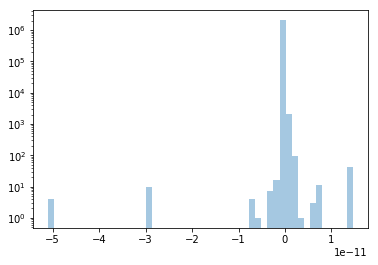

In [120]:
#to assess again if the feature makes sense, we can compare the total_money_spent_cate with average_money_spent_cate*buys in cate.
#they should be quite similar
diff = train.total_money_spent_cate - train.average_money_spent_cate*train.buy_cate
sns.distplot(diff,hist_kws={"log":True},kde=False)

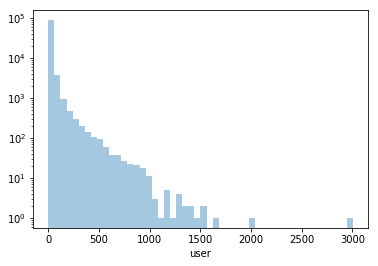

In [10]:
#how many entries does a user have in the trainset
sns.distplot(train.user.value_counts(),hist_kws={"log":True},kde=False)

weitere Idee:

- Unterschied von Preis gezeigeter Werbung zum Durchschnittspreis des Users

- Unterschied von Preis gezeigeter Werbung zum Durchschnitsspreis der Kategorie der Add (potentielle Schnäppchen)

Problem: Durchschnittsausgabe des Users kann aktuell nicht ermittelt werden

In [161]:
train.head()

,user,time_stamp,adgroup_id,pid,clk,cate_id,campaign_id,customer,brand,price,...,total_actions,pv_cate,cart_cate,fav_cate,buy_cate,total_cate,total_money_spent,total_money_spent_cate,mean_money_spent,mean_money_spent_cate
0,286630,1494218579,13,0,0,7211,130458,6395,112840.0,289.0,...,1861.0,176.0,2.0,0.0,0.0,178.0,258717.60,231979.87,631.018537,1870.805403
1,286630,1494289247,13,0,0,7211,130458,6395,112840.0,289.0,...,1861.0,176.0,2.0,0.0,0.0,178.0,258717.60,231979.87,631.018537,1870.805403
2,26279,1494478631,38,0,0,4535,394495,5122,387739.0,1800.0,...,170.0,0.0,0.0,0.0,0.0,0.0,53436.97,41791.67,732.013288,1492.559643
3,683451,1494229042,85,0,0,6873,398858,53487,443907.0,720.0,...,889.0,98.0,0.0,0.0,0.0,98.0,136930.50,81555.00,2043.738806,3545.869565
4,738208,1494198871,102,1,0,126,138148,20107,102457.0,98.0,...,1063.0,0.0,0.0,0.0,0.0,0.0,35393.34,98.00,239.144189,98.000000


### Features related to clicks

In [208]:
#general clicks on adds
ads_shown = train.groupby(["user"])["clk"].size() #number of adds shown to user
clicks = train.groupby(["user"])["clk"].sum() #number of times a user clicked on adds
click_ratio = clicks/ads_shown # ratio of clicks to opportunities to click
clicks = clicks.to_frame().reset_index().rename(index=int,columns={"clk":"clicks"})
click_ratio = click_ratio.to_frame().reset_index().rename(index=int,columns={"clk":"click_ratio"})

#clicks on specific adds
ads_shown_per_ad = train.groupby(["user","adgroup_id"])["clk"].size() #number of times a add was shown to user
clicks_per_ad = train.groupby(["user","adgroup_id"])["clk"].sum() #number of times a user clicked on a specific add
click_ratio_per_ad = clicks_per_ad/ads_shown_per_ad # ratio of clicks to opportunities to click
clicks_per_ad = clicks_per_ad.to_frame().reset_index().rename(index=str,columns={"clk":"clicks_per_ad"})
click_ratio_per_ad = click_ratio_per_ad.to_frame().reset_index().rename(index=str,columns={"clk":"click_ratio_per_ad"})

#clicks on categories
ads_shown_per_cate = train.groupby(["user","cate_id"])["clk"].size() #number of times a add of an category was shown to user
clicks_per_cate = train.groupby(["user","cate_id"])["clk"].sum() #number of times a user clicked on an add of a specific category
click_ratio_per_cate = clicks_per_cate/ads_shown_per_cate # ratio of clicks to opportunities to click
clicks_per_cate = clicks_per_cate.to_frame().reset_index().rename(index=str,columns={"clk":"clicks_per_cate"})
click_ratio_per_cate = click_ratio_per_cate.to_frame().reset_index().rename(index=str,columns={"clk":"click_ratio_per_cate"})

#clicks on brands
ads_shown_per_brand = train.groupby(["user","brand"])["clk"].size() #number of times a add of an category was shown to user
clicks_per_brand = train.groupby(["user","brand"])["clk"].sum() #number of times a user clicked on an add of a specific category
click_ratio_per_brand = clicks_per_brand/ads_shown_per_brand # ratio of clicks to opportunities to click
clicks_per_brand = clicks_per_brand.to_frame().reset_index().rename(index=str,columns={"clk":"clicks_per_brand"})
click_ratio_per_brand = click_ratio_per_brand.to_frame().reset_index().rename(index=str,columns={"clk":"click_ratio_per_brand"})

In [188]:
#merge everything important into train
train = pd.merge(train,clicks,how="left",left_on=["user"], right_on=["user"])
train = pd.merge(train,click_ratio,how="left",left_on=["user"], right_on=["user"])

train = pd.merge(train,clicks_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])
train = pd.merge(train,click_ratio_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])

train = pd.merge(train,clicks_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])
train = pd.merge(train,click_ratio_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

train = pd.merge(train,clicks_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])
train = pd.merge(train,click_ratio_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])

In [41]:
train = pd.merge(train,ads_shown.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown"}),
                 how="left",left_on=["user"], right_on=["user"])
train = pd.merge(train,ads_shown_per_ad.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown_per_ad"}),
                 how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])
train = pd.merge(train,ads_shown_per_cate.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown_per_cate"}),
                 how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])
train = pd.merge(train,ads_shown_per_brand.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown_per_brand"}),
                 how="left",left_on=["user","brand"], right_on=["user","brand"])

In [209]:
test = pd.merge(test,ads_shown.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown"}),
                 how="left",left_on=["user"], right_on=["user"])
test = pd.merge(test,ads_shown_per_ad.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown_per_ad"}),
                 how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])
test = pd.merge(test,ads_shown_per_cate.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown_per_cate"}),
                 how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])
test = pd.merge(test,ads_shown_per_brand.to_frame().reset_index().rename(index=int,columns={"clk":"ads_shown_per_brand"}),
                 how="left",left_on=["user","brand"], right_on=["user","brand"])

In [42]:
#adjusted click ratio: do not include the current seen train entry in calculations
adjusted_click_ratio = (train.clicks-train.clk)/np.maximum(train.ads_shown-1,1) # -1 oder nicht
train["adjusted_click_ratio"] = adjusted_click_ratio
adjusted_click_ratio_per_ad = (train.clicks_per_ad-train.clk)/np.maximum(train.ads_shown_per_ad-1,1) # -1 oder nicht
train["adjusted_click_ratio_per_ad"] = adjusted_click_ratio_per_ad
adjusted_click_ratio_per_cate = (train.clicks_per_cate-train.clk)/np.maximum(train.ads_shown_per_cate-1,1) # -1 oder nicht
train["adjusted_click_ratio_per_cate"] = adjusted_click_ratio_per_cate
adjusted_click_ratio_per_brand = (train.clicks_per_cate-train.clk)/np.maximum(train.ads_shown_per_brand-1,1) # -1 oder nicht
train["adjusted_click_ratio_per_brand"] = adjusted_click_ratio_per_brand

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in maximum
  


In [237]:
# for the test set, we cannot adjust the click ratio, since we dont know if they clicked so we will just copy the standard
#ratios so that both dataframes have the same structure
test["adjusted_click_ratio"] = adjusted_click_ratio
test["adjusted_click_ratio_per_ad"] = adjusted_click_ratio_per_ad
test["adjusted_click_ratio_per_cate"] = adjusted_click_ratio_per_cate
test["adjusted_click_ratio_per_brand"] = adjusted_click_ratio_per_brand

Idea: how often was an specific add clicked ("good" vs "bad" adds)

In [44]:
add_clicked = train.groupby("adgroup_id")["clk"].sum()
add_shown = train.groupby("adgroup_id")["clk"].size()
add_clicked_ratio = add_clicked/add_shown
add_clicked_ratio = add_clicked_ratio.to_frame().reset_index().rename(index=str,columns={"clk":"add_clicked_ratio"})

In [192]:
train = pd.merge(train,add_clicked_ratio,how="left",left_on=["adgroup_id"], right_on=["adgroup_id"])

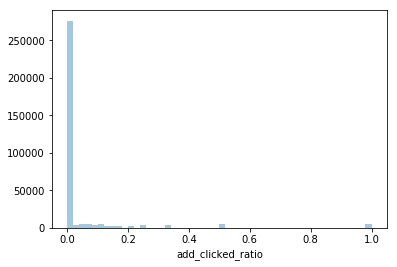

In [52]:
sns.distplot(add_clicked_ratio.add_clicked_ratio,kde=False)

In [53]:
train[["add_clicked_ratio"]].describe()

,add_clicked_ratio
count,2.079023e+06
mean,5.154633e-02
std,8.265419e-02
min,0.000000e+00
25%,0.000000e+00
50%,3.488372e-02
75%,7.407407e-02
max,1.000000e+00


In [155]:
adds_clicked_ratio.head()

adgroup_id
13    0.000000
16    0.000000
18    0.000000
23    0.041667
29    0.142857
Name: clk, dtype: float64

# PCA

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
drop = ["user","unix","time_stamp"]
train_input=train.fillna(-1).drop(drop,axis=1)
scaler.fit(train_input)

# Apply transform to both the training set and the test set.
train_scaled = scaler.transform(train_input)

In [158]:
import numpy as np
from sklearn.decomposition import PCA

n_components = 10
pca = PCA(n_components=n_components, svd_solver='full')

principal_components = pca.fit_transform(train_scaled)                 
principalDf = pd.concat([pd.DataFrame(data = principal_components), train.clk],axis=1)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[0.09775827 0.07810457 0.07639096 0.05895659 0.04708883 0.04653957
 0.04499974 0.03976195 0.03677881 0.03092714]
[3024.21500311 2703.17472361 2673.35662825 2348.56222239 2098.91499929
 2086.63782359 2051.827685   1928.72257422 1854.96076372 1701.00574431]


In [159]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,clk
0,2.023563,0.919989,0.167102,-0.812052,-0.100710,-0.150405,-0.875468,1.508808,-0.900061,-0.130418,0
1,2.025666,0.927647,0.164045,-0.805631,-0.113519,-0.137943,-0.874756,1.169156,-0.928601,-0.170514,0
2,-1.950445,-0.808115,0.382043,-1.599834,-1.124279,0.054932,-0.232705,0.454168,0.442506,-0.321249,0
3,0.156012,-1.769656,0.648346,-3.136696,-1.060898,0.065358,0.011890,1.609367,0.562942,-0.460017,0
4,-0.334639,0.330673,-0.034174,-0.940938,0.908876,0.062943,-2.036336,-2.412603,-0.229869,0.248774,0


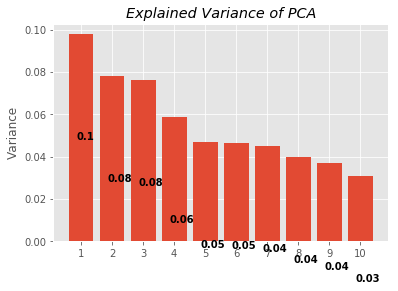

In [160]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
x=[i for i in range(1,n_components+1)]
values = pca.explained_variance_ratio_
plt.bar(x,values)
ax.set_xticks(x)
ax.set_ylabel("Variance")
ax.set_title("Explained Variance of PCA",fontstyle="italic")
for i, v in enumerate(values):
    ax.text( i+0.85, v - 0.05, np.round(v,2), color='black', fontweight='bold')


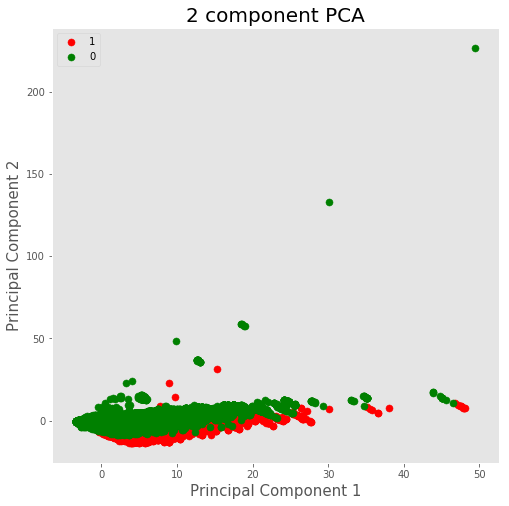

In [163]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['clk'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 0]
               , principalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

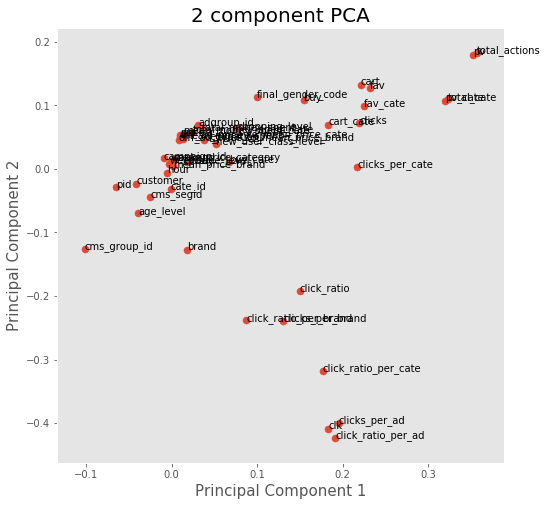

In [162]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
x=pca.components_[0]
y=pca.components_[1]
ax.scatter(x, y, s = 50)

n = train_input.columns#labels
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

ax.grid()
plt.show()


# In Depth comparison of Clicks and NonClicks

In [133]:
ones = train[train.clk==1].fillna(-1)
zeros = train[train.clk==0].fillna(-1)

In [134]:
#creates a boxplot for the given feature of the given data set against the quality feature of that data set
def plotAgainstClick(feature,data):     
    #sns.stripplot(x="quality",y=feature,data=wineData,jitter=0.2,edgecolor="none",alpha=0.40)
    #ax = sns.boxplot(x="clk",y=feature,data=data,showfliers=False)
    ax = sns.distplot(data[f],kde=False)
    # Add transparency to colors
    #for patch in ax.artists:
    # r, g, b, a = patch.get_facecolor()
    # patch.set_facecolor((r, g, b, .3))
    #return ax;

In [78]:
ones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107166 entries, 33 to 2078938
Data columns (total 50 columns):
user                                 107166 non-null int64
time_stamp                           107166 non-null int64
adgroup_id                           107166 non-null int64
pid                                  107166 non-null int64
clk                                  107166 non-null int64
cate_id                              107166 non-null int64
campaign_id                          107166 non-null int64
customer                             107166 non-null int64
brand                                107166 non-null float64
price                                107166 non-null float64
cms_segid                            107166 non-null int64
cms_group_id                         107166 non-null int64
final_gender_code                    107166 non-null int64
age_level                            107166 non-null int64
pvalue_level                         107166 non-null floa

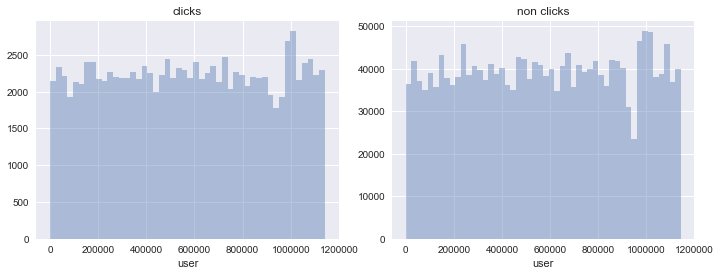

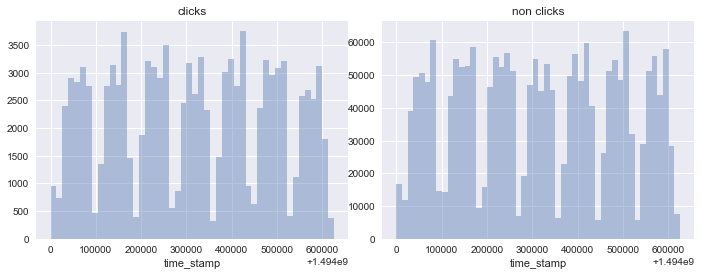

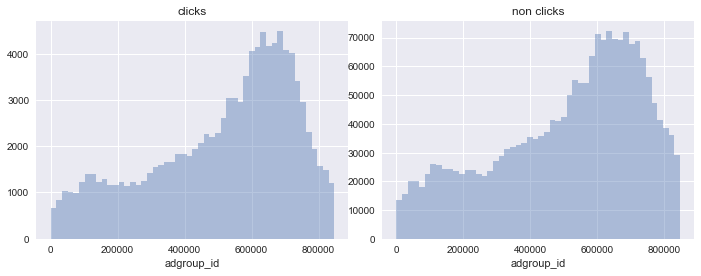

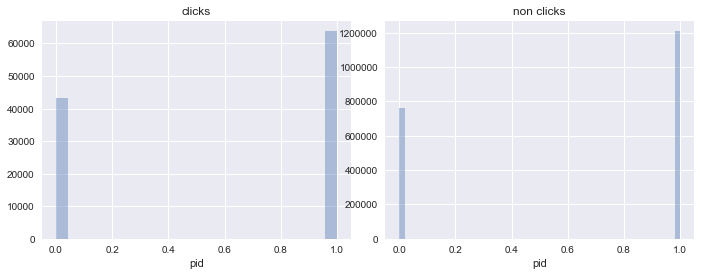

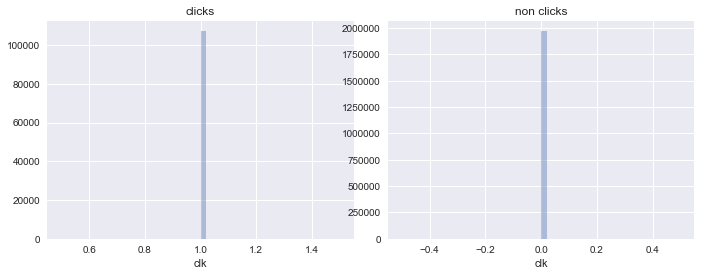

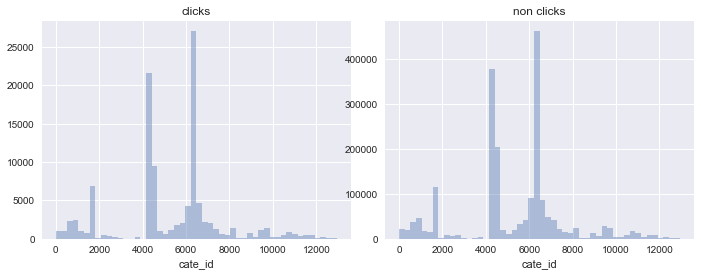

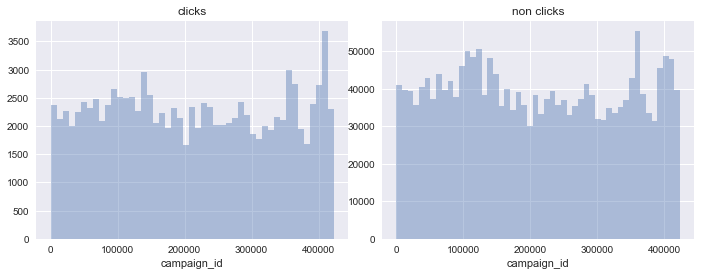

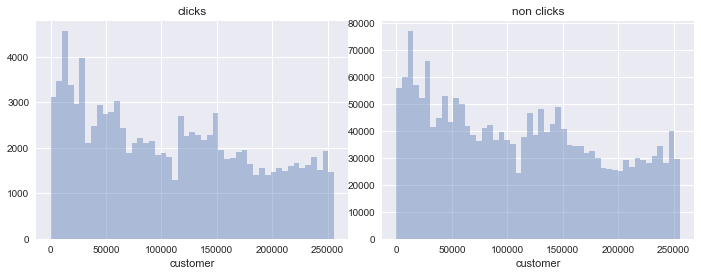

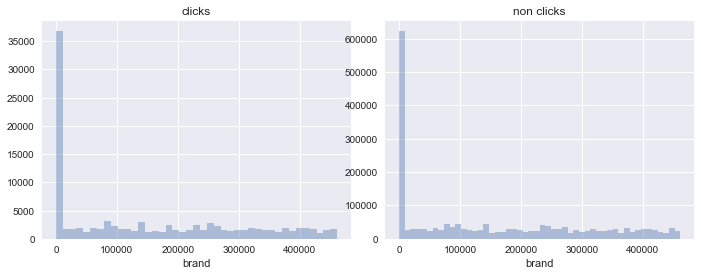

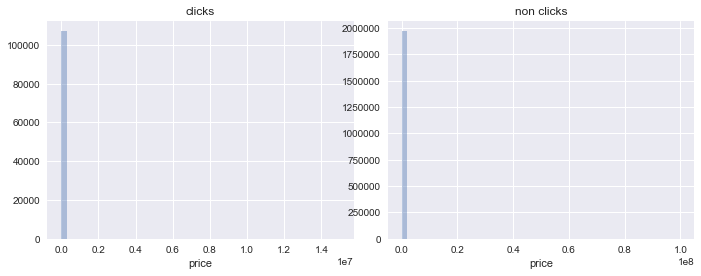

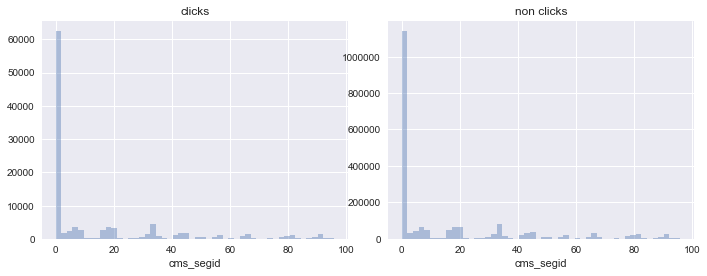

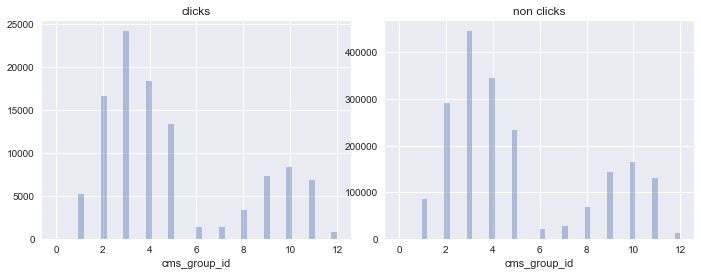

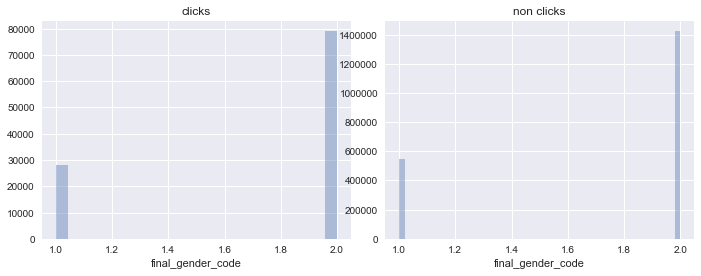

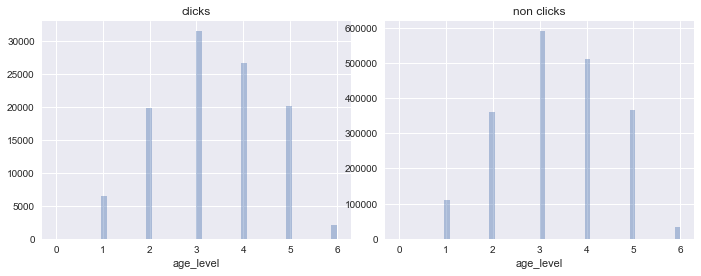

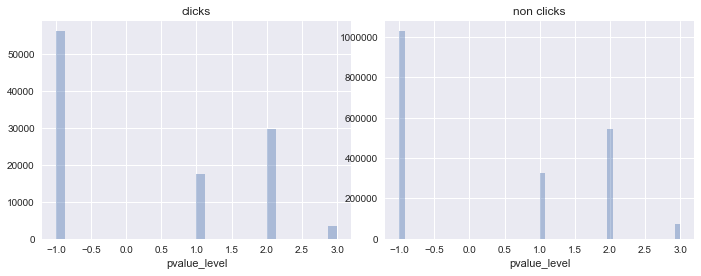

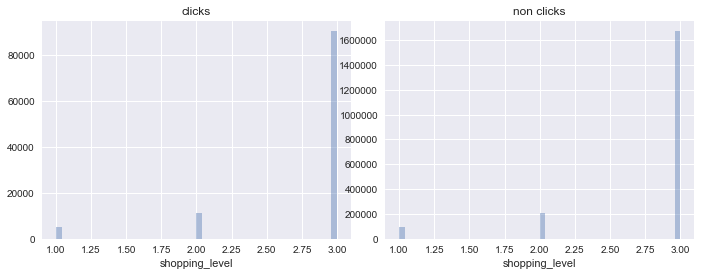

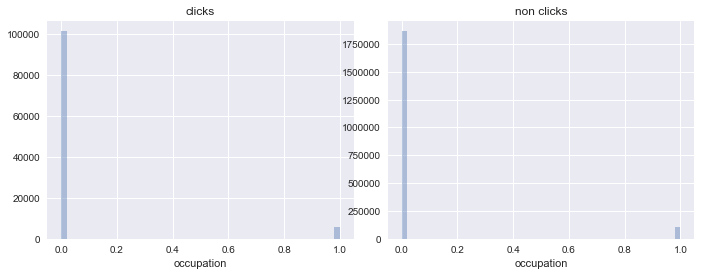

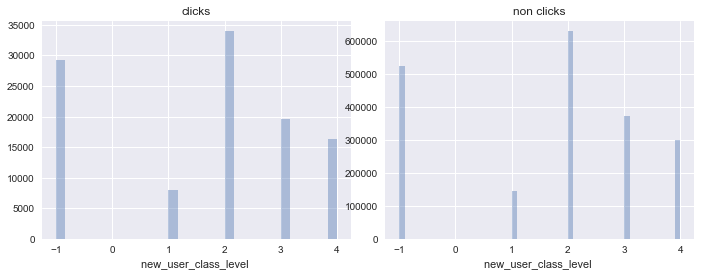

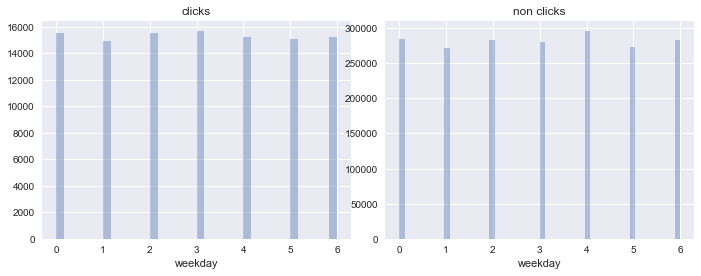

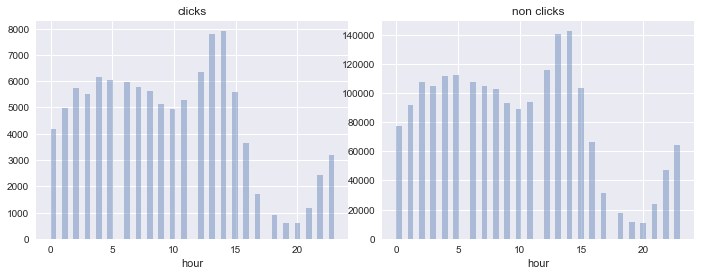

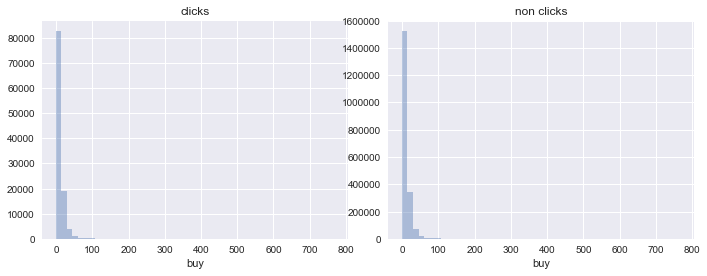

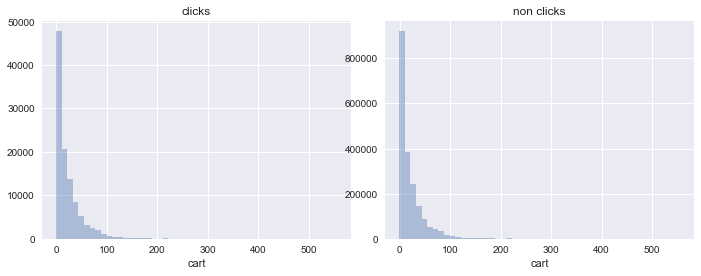

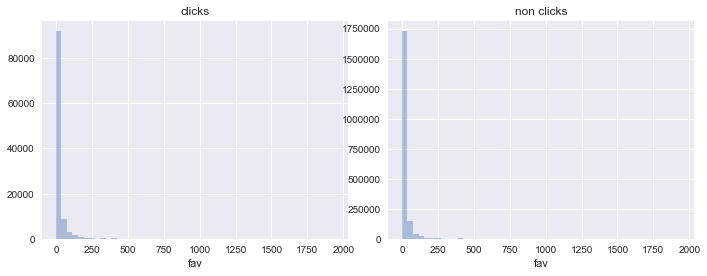

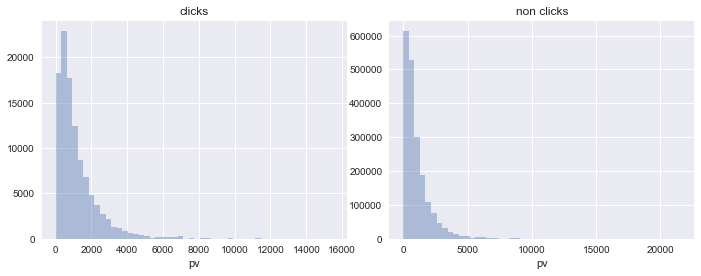

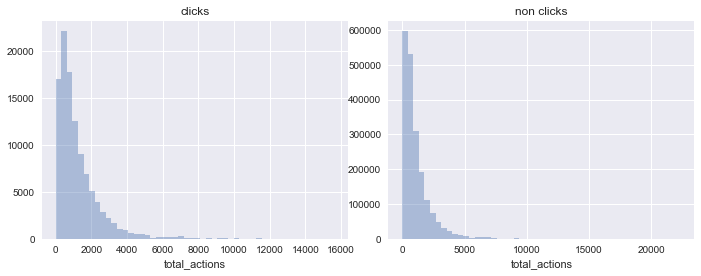

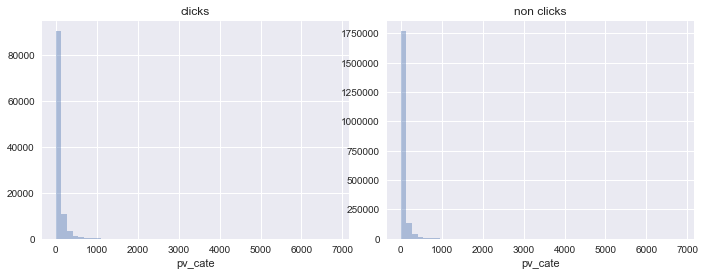

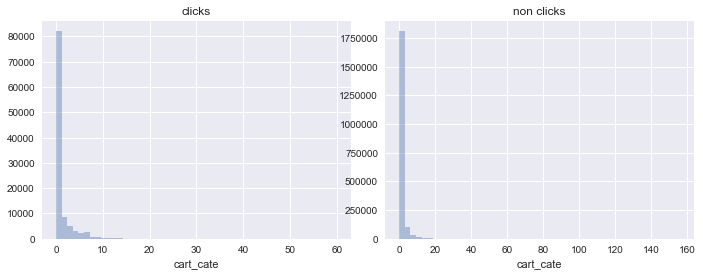

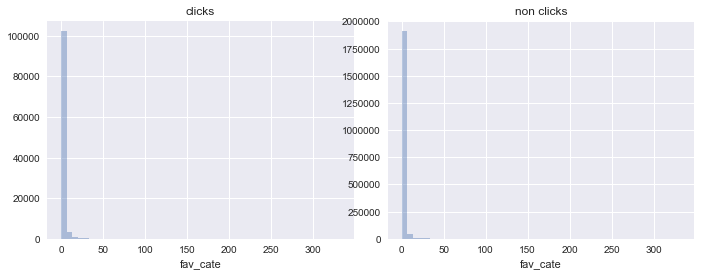

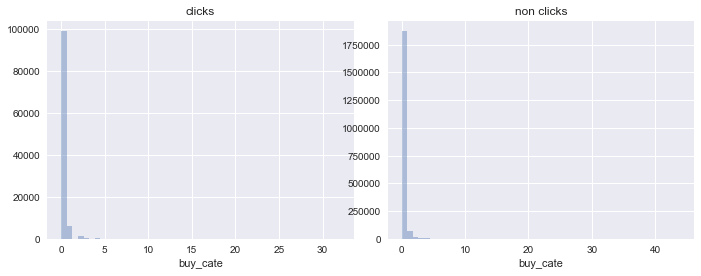

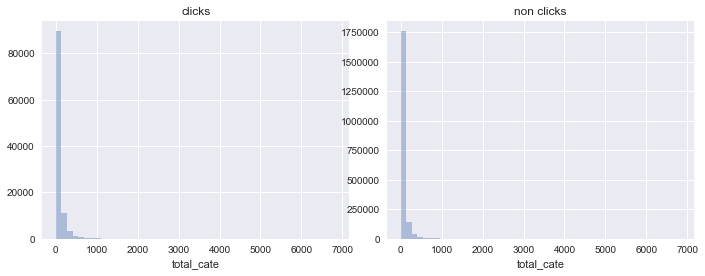

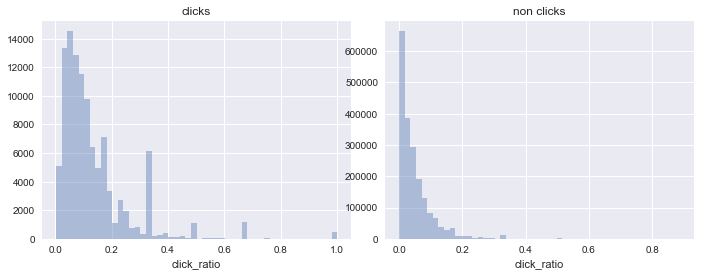

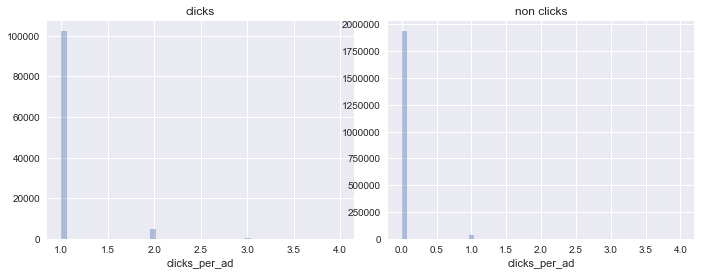

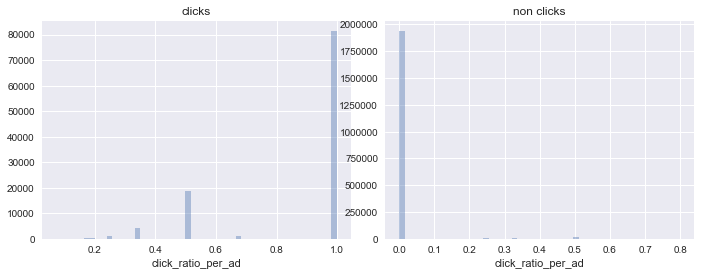

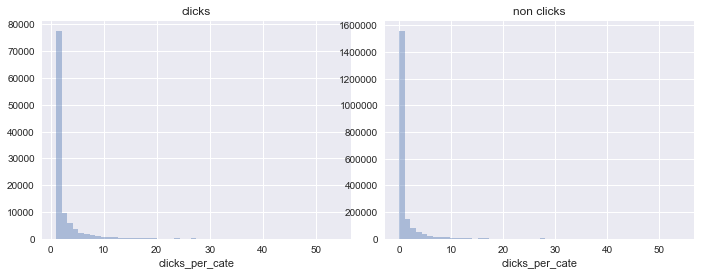

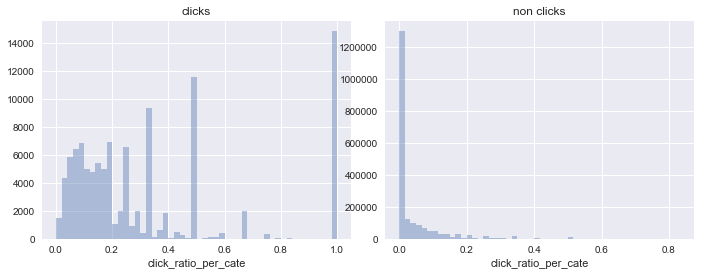

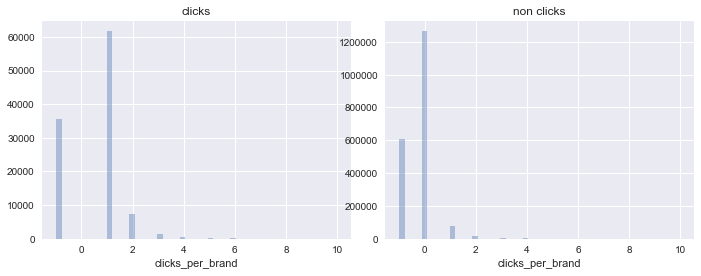

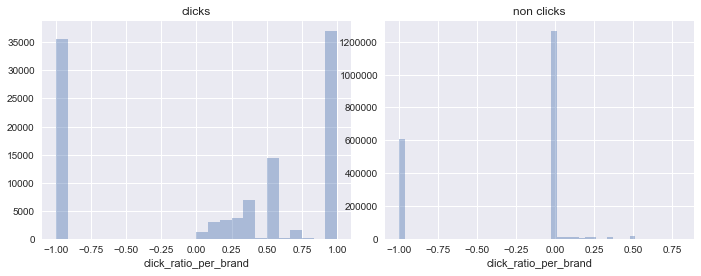

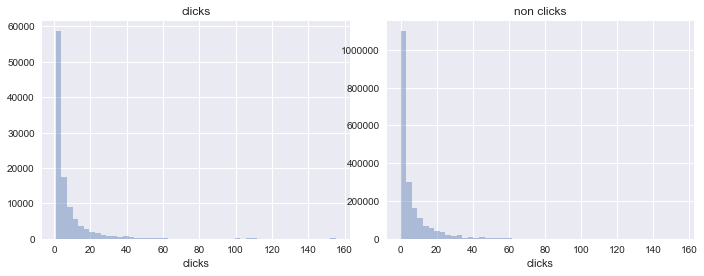

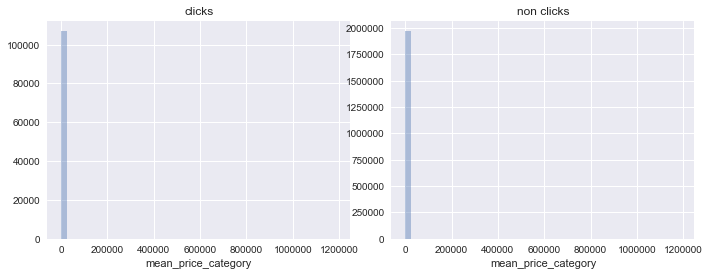

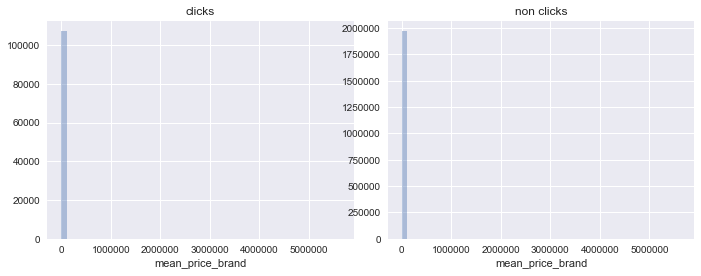

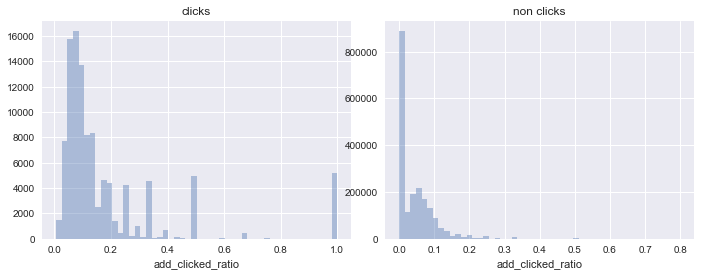

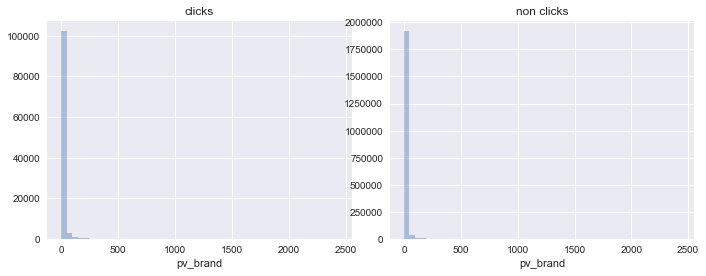

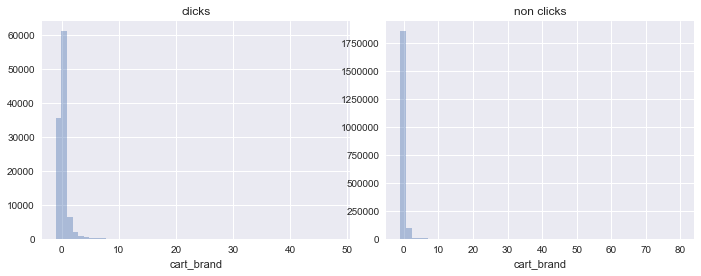

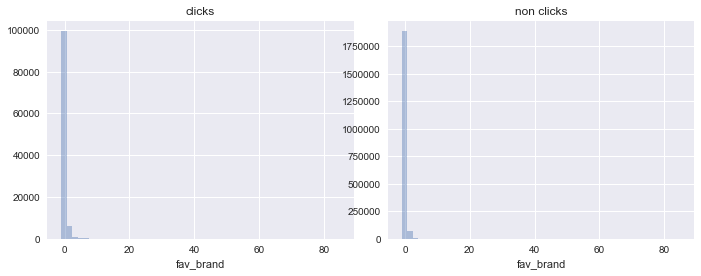

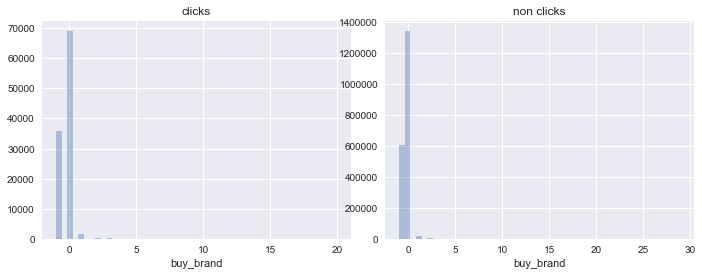

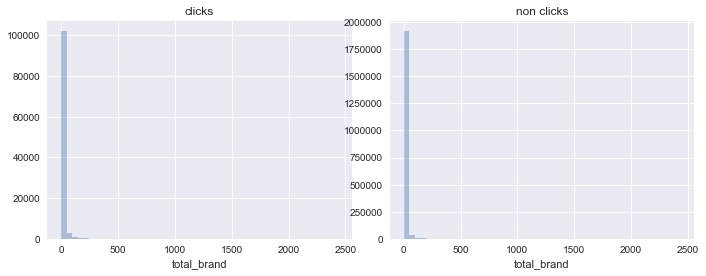

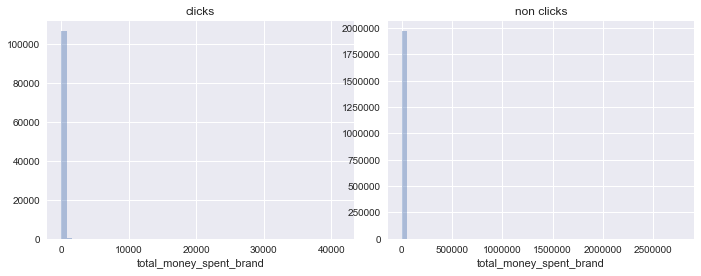

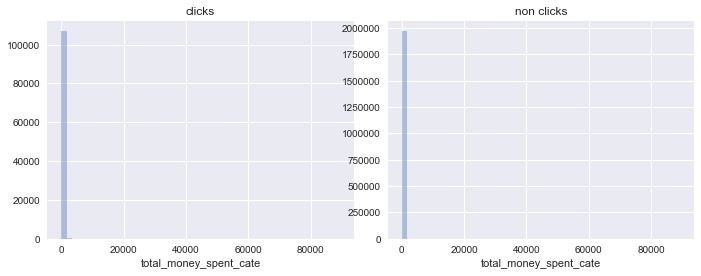

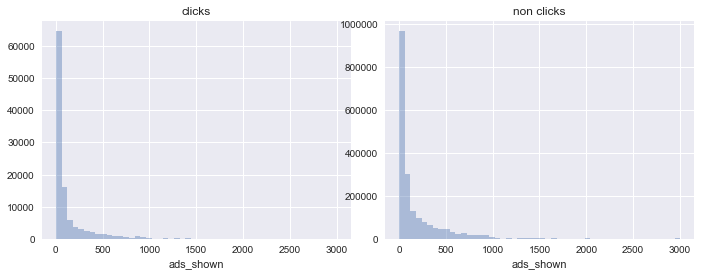

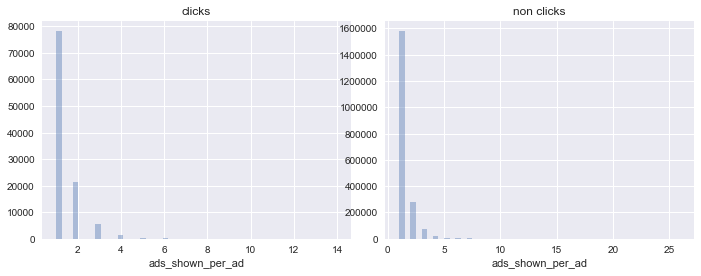

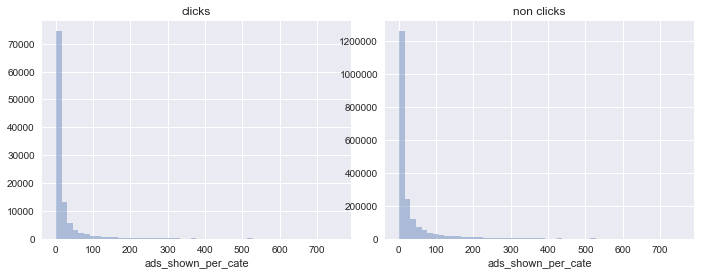

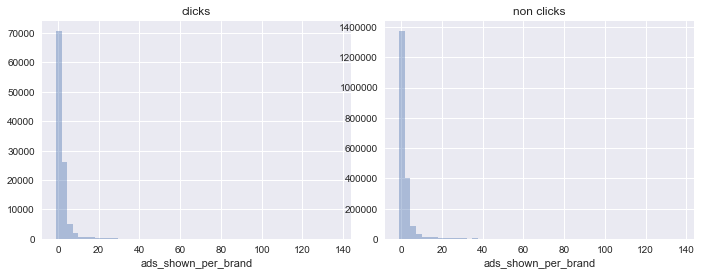

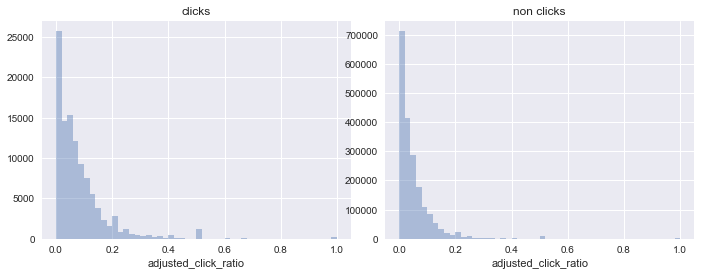

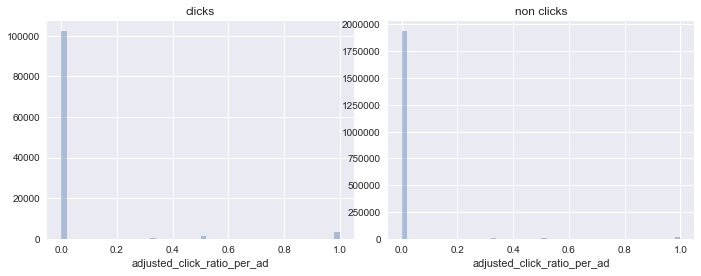

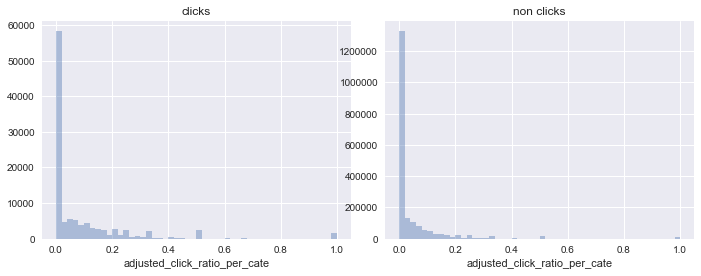

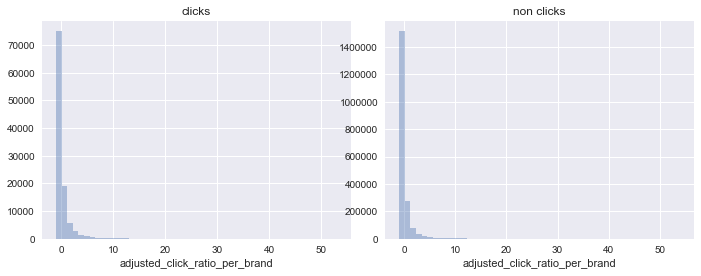

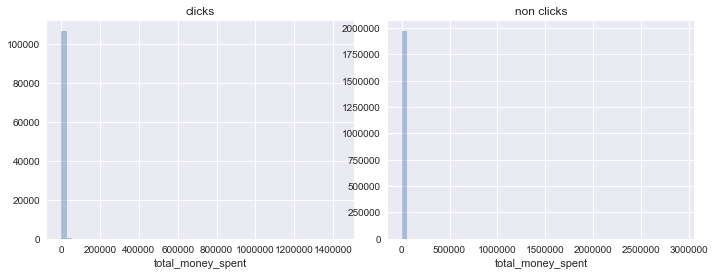

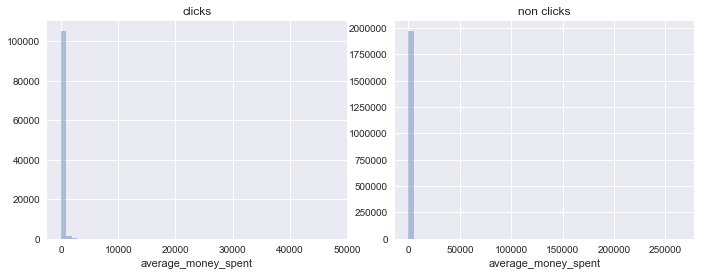

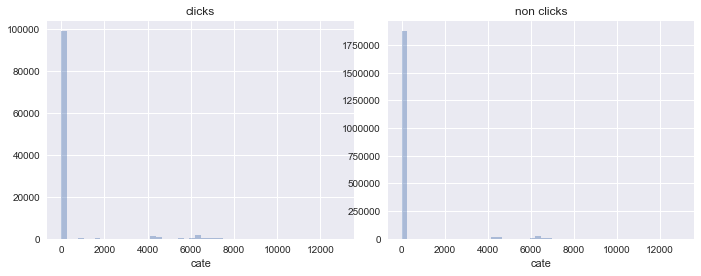

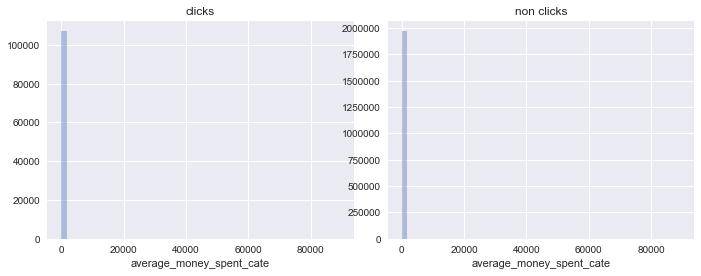

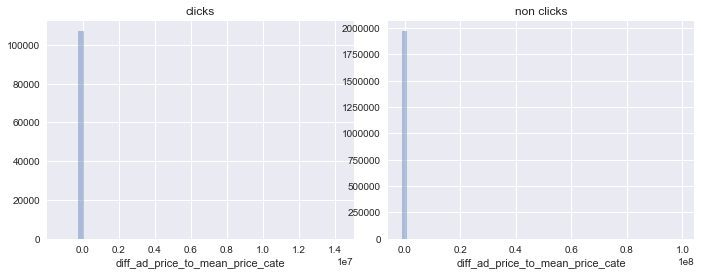

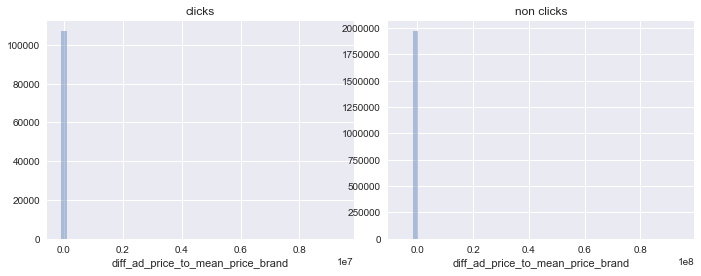

In [135]:
i= 1
length = len(list(ones))
sns.set(rc={'figure.figsize':(10,4)})
for f in list(ones):
    if(ones[f].dtype == np.float64 or ones[f].dtype == np.int64):
        plt.subplot(1,2,i)
        plt.tight_layout()    
        i+=1
        ax = plotAgainstClick(f,ones)    
        plt.title("clicks")

        plt.subplot(1,2,i)
        plt.tight_layout()    
        ax = plotAgainstClick(f,zeros)    
        plt.title("non clicks")
        #ax.yaxis.label.set_visible(False)
        plt.show()
        i=1
    else: 
        continue
    

Beobachtungen:  
   - time_stamp zeigt wie erwartet einen Tag-Nacht Rythmus
   - adgroup_id und cate_id etwa gleich verteilt in beiden Gruppen
   - viele Brands sind NA (hier -1)
   - price hat Outlier, muss gefiltert werden
   - insgesamt scheint es ca 2.5 mal so viele Frauen wie Männer zu geben, click Verteilung ist aber ähnlich

# Simple prediction

## Prepare test set

In [130]:
#merge test
test = test.join(user_profile.set_index("userid"),on="user")
test = test.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")

In [131]:
#add counts of different btag actions to user
behavior_groups_btags = behavior_log.groupby(["user","btag"]).size().unstack()
behavior_groups_btags["total_actions"] = behavior_groups_btags.sum(1) #rowsum
behavior_groups_btags  = behavior_groups_btags.fillna(0)
test = test.join(behavior_groups_btags,on="user")

In [132]:
#add time
test["unix"]=pd.to_datetime(test.time_stamp,unit="s")
test["weekday"]=test.unix.dt.weekday
test["hour"]=test.unix.dt.hour
test["weekend"] = test.weekday >= 5

In [133]:
%%time

#adds number of actions per actiontype and category
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","cate"],as_index=False)
counter = 0

#group by user and category, so we look up each combination only once (reduces #lookups to a forth)
user_category_groups = test.groupby(["user","cate_id"]).size().reset_index(name="count")
behavior_by_category = pd.DataFrame()

start_time = 0
for index, row in user_category_groups.iterrows():
    
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.cate_id)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_category_groups.at[index,i+"_cate"] = count
            total_action_count += count
        else:
            user_category_groups.at[index,i+"_cate"] = 0

    user_category_groups.at[index,"total_cate"] = total_action_count
    
    #print progress
    counter +=1
    clear_output(wait=True)
    start_time = start_time or timeit.default_timer()
    elapsed = timeit.default_timer() - start_time
    total = len(user_category_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)
    
#merge into testset
user_category_groups=user_category_groups.drop(["count"],axis=1)
test = pd.merge(test,user_category_groups,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

('Done with row 40106 of 40106, 100.0%. Runtime: 0:02:18.004878, exp. remaining: 0:00:00 ',)

Wall time: 7min 53s


In [206]:
%%time
#old slow code, saved if timing code is needed later
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","brand"],as_index=False)
counter = 0

#group by user and brand, so we look up each combination only once (reduces #lookups)
user_brand_groups = test.groupby(["user","brand"]).size().reset_index(name="count")

start_time = 0
for index, row in user_brand_groups.iterrows():
    
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.brand)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_brand_groups.at[index,i+"_brand"] = count
            total_action_count += count
        else:
            user_brand_groups.at[index,i+"_brand"] = 0

    user_brand_groups.at[index,"total_brand"] = total_action_count
    
    start_time = start_time or timeit.default_timer()
    #print progress
    counter +=1
    clear_output(wait=True)
    elapsed = timeit.default_timer() - start_time
    total = len(user_brand_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)
    
    
user_brand_groups=user_brand_groups.drop(["count"],axis=1)
test = pd.merge(test,user_brand_groups,how="left",left_on=["user","brand"], right_on=["user","brand"])

('Done with row 50608 of 50608, 100.0%. Runtime: 0:03:17.462733, exp. remaining: 0:00:00 ',)

Wall time: 16min 54s


In [138]:
#merge clicks etc into test
test = pd.merge(test,clicks,how="left",left_on=["user"], right_on=["user"])
test = pd.merge(test,click_ratio,how="left",left_on=["user"], right_on=["user"])

test = pd.merge(test,clicks_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])
test = pd.merge(test,click_ratio_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])

test = pd.merge(test,clicks_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])
test = pd.merge(test,click_ratio_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

test = pd.merge(test,clicks_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])
test = pd.merge(test,click_ratio_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])

In [207]:
#add how often a specific add was clicked
test = pd.merge(test,add_clicked_ratio,how="left",left_on=["adgroup_id"], right_on=["adgroup_id"])

In [64]:
test.to_csv("test_extended.csv",index=False)

In [139]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train.pid)
train.pid = le.transform(train.pid)
test.pid = le.transform(test.pid)

TypeError: '<' not supported between instances of 'int' and 'str'

## Model

In [370]:
# sample train set so that ratio of 0 and 1 matches test set (21.559% 1s)
trainRatio = train[train.clk==1].shape[0]/(train[train.clk==1].shape[0]+train[train.clk==0].shape[0]) #ratio of ones
testRatio = 0.21559
print("Ratio of ones in training set: "+str(trainRatio)+"%")
if trainRatio > testRatio: #relativeley more ones in train set than in test set -> zeros are limiting factor
    zeros = train[train.clk == 0]
    ones = train[train.clk == 1].sample(round(testRatio*zeros.shape[0]/(1-testRatio)))
    print("first: zeros are limiting factor")
    print("Number of ones: " + str(ones.shape[0]))
    print("Number of zeros: " + str(zeros.shape[0]))
else: # ones are limiting factor
    ones = train[train.clk == 1]
    zeros = train[train.clk == 0].sample(round(ones.shape[0]/testRatio-ones.shape[0]))
    print("second: ones are limiting factor")
    print("Number of ones: " + str(ones.shape[0]))
    print("Number of zeros: " + str(zeros.shape[0]))
train_set = pd.concat([ones,zeros])

r = train_set[train_set.clk==1].shape[0]/(train_set[train_set.clk==1].shape[0]+train_set[train_set.clk==0].shape[0])
print("Final ratio: "+str(r)+"%")

Ratio of ones in training set: 0.05154632728930849%
second: ones are limiting factor
Number of ones: 107166
Number of zeros: 389916
Final ratio: 0.21559018431566623%


In [371]:
train_set_full = train_set.copy()

In [389]:
from sklearn.model_selection import train_test_split
train_set_pre,validate_test = train_test_split(train_set_full,test_size=0.2,random_state=42)

In [449]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import lightgbm as lgb
from sklearn import svm
#gnb = linear_model.SGDClassifier(loss="modified_huber")
#gnb = LogisticRegression(solver = 'saga')
gnb = lgb.LGBMClassifier()
#gnb = svm.SVC()
#gnb = RandomForestClassifier()
drop = ["unix","time_stamp","user","adgroup_id","cate_id","cate","campaign_id","customer",
        "brand","ads_shown","ads_shown_per_ad","ads_shown_per_cate","ads_shown_per_brand",
        "click_ratio_per_ad","clicks_per_ad","click_ratio_per_cate","click_ratio","clicks_per_cate"
       ,"click_ratio_per_brand","clicks","clicks_per_brand","add_clicked_ratio"]

#------------------------------------------------
#change these lines to switch train/test
#full train and test set
#train_set = train_set_full.drop(drop,axis=1)
#test_set = test

#split train and validate set
train_set = train_set_pre.drop(drop,axis=1)
test_labels = validate_test.clk
test_set = validate_test.drop(["clk"],axis=1)
#------------------------------------------------

test_set = test_set.drop(drop,axis=1)
test_set = test_set.fillna(0)
labels = train_set.clk
train_set = train_set.drop(["clk"],axis=1)
train_set = train_set.fillna(-1)

In [450]:
#find difference in train and test set
set(train_set.columns).symmetric_difference(test_set.columns)

set()

In [451]:
%%time
model = gnb.fit(train_set,labels)
#pred = model.predict(test_set.drop(["id"],axis=1))
pred = model.predict(test_set)

Wall time: 3.64 s


E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


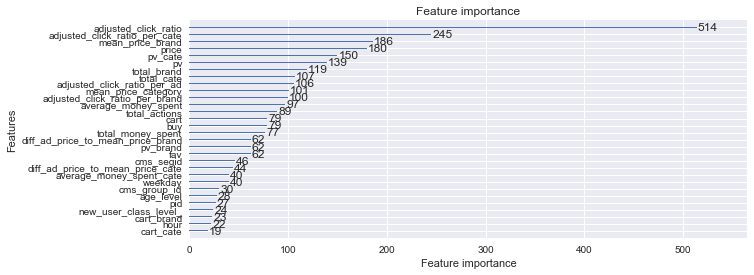

In [453]:
#if using lightGBM
ax = lgb.plot_importance(gnb, max_num_features=30)
plt.show()

# if not using lightGBM
#pd.DataFrame({"coefs": model.coef_[0], "feature":train_set.columns.values}).sort_values(by="coefs",ascending=False)

In [439]:
submission = pd.DataFrame({"id":test.id,"clk":pred})
submission.to_csv("LightGBM_extended.csv",index=False)

In [454]:
np.mean(pred)

0.07651608879769053

In [455]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred,test_labels)

0.20460283452528238

In [441]:
submission.clk.value_counts()

0    54750
1     5902
Name: clk, dtype: int64

In [94]:
def checkRatio (x):
    if x.click_ratio >= 0.5:
        return 1;
    else:
        return 0;

In [95]:
pred = test_set.apply(lambda x: checkRatio(x),axis=1)

In [241]:
train.to_csv("train_again.csv",index=False)

In [240]:
test.to_csv("test_again.csv",index=False)

In [186]:
test_set.iloc[5]

id                                             6
user                                      858191
adgroup_id                                   102
pid                                  430548_1007
cms_segid                                     35
cms_group_id                                   4
final_gender_code                              2
age_level                                      4
pvalue_level                                   3
shopping_level                                 3
occupation                                     0
new_user_class_level                           1
cate_id                                      126
campaign_id                               138148
customer                                   20107
brand                                     102457
price                                         98
mean_price_category                      119.098
mean_price_brand                         96.3333
diff_ad_price_to_mean_price_cate        -21.0984
diff_ad_price_to_mea

# Ansätze

PCA -> Clustering?
Apriori Rules?

unterschied von preis gezeigeter werbung zum durcschnitsspreis des user

unterschied von preis gezeigeter werbung zum durcschnitsspreis des kategorie (schnäppchen)

## Archive